In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/taubertier/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
def plot_evol(GPU, N, time, eff):
    
    plt.figure(figsize=(12,6))
    for i,t in enumerate(time):
        plt.loglog(GPU, t, 'o-', label=f"Grid N={N[i]}")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Execution time (s)")
    plt.title("Execution time of Jacobi solver using \"$make$ $cub$\"")
    plt.xticks(GPU,GPU)
    plt.grid(True, which="both")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12,6))
    for i,e in enumerate(eff):
        plt.semilogx(GPU, e, 'o-', label=f"Grid N={N[i]}")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Efficiency (%)")
    plt.title("Efficiency of Jacobi solver using \"$make$ $cub$\"")
    plt.xticks(GPU,GPU)
    plt.grid(True, which="both")
    plt.ylim(1,100)
    plt.legend()
    plt.show()

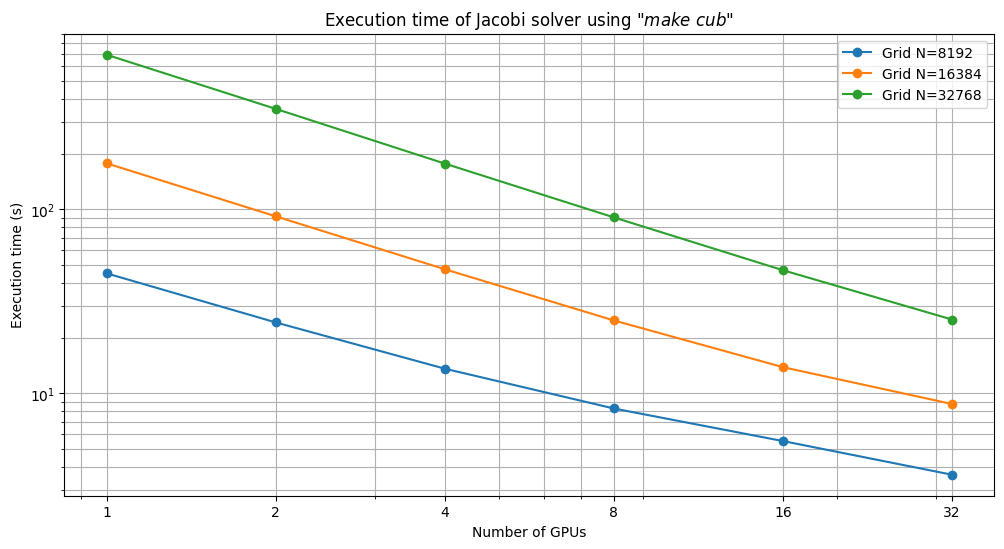

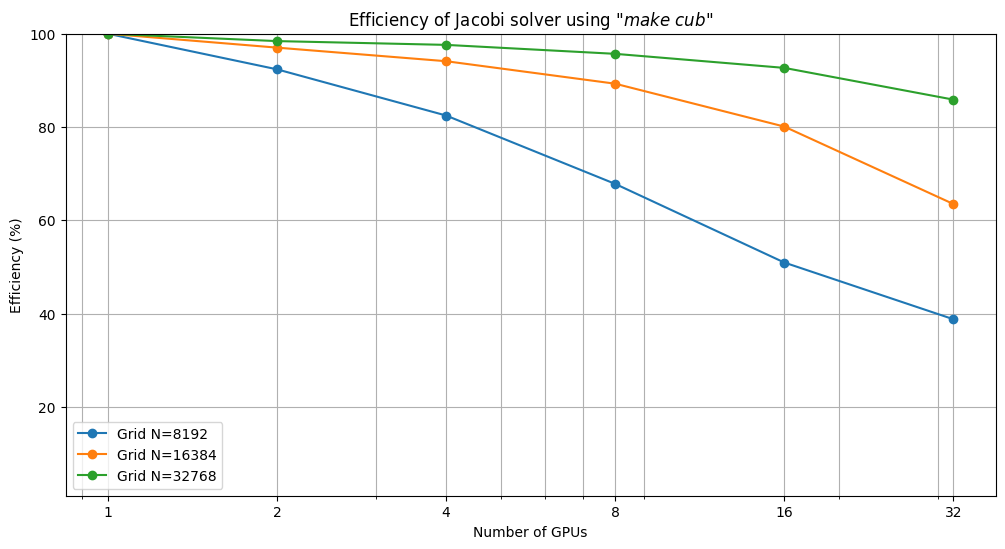

In [7]:
GPU = [1,2,4,8,16,32]
N = [8192, 16384, 32768]
time = [[44.9516, 24.3325, 13.6346, 8.2855, 5.5125, 3.6177],
        [178.1337, 91.7771, 47.3181, 24.9347, 13.8957, 8.7647],
        [693.1242, 352.0841, 177.5163, 90.5318, 46.7390, 25.2184]]
eff = [[100, 92.37, 82.47, 67.82, 50.97, 38.82],
        [100, 97.02, 94.11, 89.29, 80.10, 63.51],
        [100, 98.42, 97.61, 95.69, 92.68, 85.88]]

plot_evol(GPU, N, time, eff)

hello yeah don't bother what's inside it's unrelated

/tmp/ipykernel_9937/570697222.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( title ="nu")


max nu=0.0 : sigma = 0.99
max nu=0.1 : sigma = 0.89
max nu=0.2 : sigma = 0.81
max nu=0.3 : sigma = 0.75
max nu=0.4 : sigma = 0.7000000000000001
max nu=0.5 : sigma = 0.67
max nu=0.6 : sigma = 0.65
max nu=0.7 : sigma = 0.63
max nu=0.8 : sigma = 0.61
max nu=0.9 : sigma = 0.5800000000000001
max nu=1.0 : sigma = 0.5


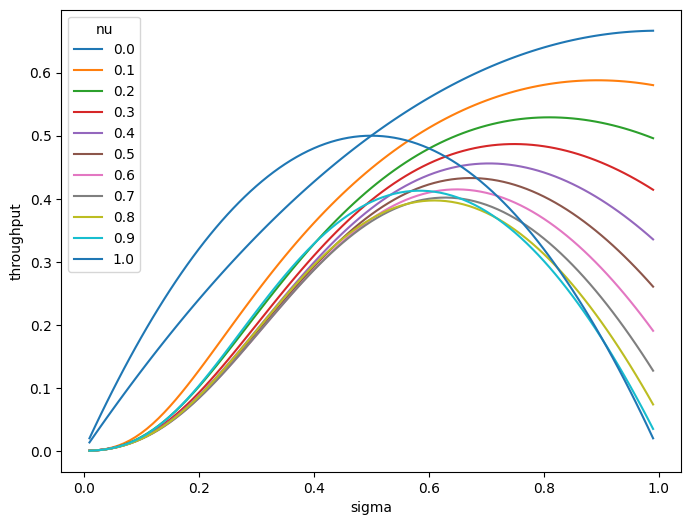

In [12]:
import pandas as pd, numpy as np
import matplotlib , matplotlib . pyplot as plt

def throughput(s , n):
    return (2*(1-s)*s + (s+n-2*s*n)*(2-2*n) + 2*(1-n)*n*(1-s)*(2*n-2*n*n)) / (3-2*n+(2-2*n)*((1-s)/(s*s)*n))
    
data = pd.DataFrame()
sl = np.arange (0.01, 1, 0.01)
for n in np.arange (0, 1.1, .1) :
    data = pd.concat([ data , pd.DataFrame({"nu": n, "sigma": sl , "throughput":[ throughput(s , n) for s in sl ]}) ])
    
fig , ax = plt.subplots(figsize =(8,6))
plt.legend( title ="nu")
plt.ylabel("throughput")
for label , df in data.groupby("nu"):
    df.plot(x="sigma", y="throughput", ax=ax, label =round(label, 1))
    temp = df.iloc[df["throughput"].idxmax(),1]
    print(f"max nu={round(label, 1)} : sigma = {temp}")
plt.show()